In [1]:
# ##################################################################################
# Archimedes, Measurement of a circle
# ----------------------------------------------------------------------------------
#
# Development of the Archimedes equations for the inner polygon.
# Version 0.1
#
# Proposition 3 Part II contains the solution for the inner polygon. The 
# derivation performed by hand is checked symbolically below using SageMath
# (Quick and dirty).
#
# References
#
# [1] T. L. HEATH, Sc.D., The Works of Archimedes, EDITED IN MODERN NOTATION, 
# WITH INTRODUCTORY CHAPTERS, CAMBRIDGE: AT THE UNIVERSITY PRESS, 1897
# [2] Dr. Saskia Roos, Michael Jung, An Introductory Course on Sage, Lecture
# Notes Summer Term 2020, University of Potsdam, Sep 30, 2020
# [3] SageMath, The Sage Development Team, Symbolic Calculus, Release 10.1, 
# Aug 21, 2023
# [4] SageMath, the Sage Mathematics Software System (Version 10.1), The Sage
# Developers, https://www.sagemath.org, 2019
# ##################################################################################

In [2]:
# User defined function for printing lines.
def println(line):
    '''Function for printing lines with line spacing in form of newlines before
    and after the line.'''
    # Convert the type of line to a string.
    line = str(line)
    # Print text, a line or a string to the notebook.
    print("\n\n{0}\n".format(line))
    # End of function. Return None.
    return None

eqno = 0

def println_eqno(exp):
    global eqno
    '''Function for printing lines with line spacing in form of newlines before
    and after the line.'''
    # Convert the type of line to a string.
    line = str(exp)
    # Print text, a line or a string to the notebook.
    eqno += 1
    print("\n(Equation {1})\t{0}\n".format(line, eqno))
    exp.show()
    # End of function. Return None.
    return None

In [3]:
# Radian to degree
def rad2deg(rad):
    '''Convert radian to degree'''
    deg = (180 / pi) * rad
    return deg

# Degree to radian
def deg2rad(deg):
    '''Convert degree to radian'''
    rad = (pi / 180) * deg
    return rad

In [4]:
def loc_calc(c0):
    p0 = c0^2 / 2
    q0 = (2 - p0)
    d0 = p0 - 1
    h0 = sqrt(p0 * q0) 
    return d0, h0

loc = []        
ac = sqrt(3)
ab = 2
bc = 1
num = 5
for i in range(0, num):
    if i == 0:
        d0, h0 = loc_calc(ac)
        loc.append((d0.n(), h0.n()))
    else:    
        ad = ab / sqrt(((bc^2 + (ab + ac)^2))/(ab + ac)^2)
        bd = sqrt(ab^2 - ad^2)
        d0, h0 = loc_calc(ad)
        loc.append((d0.n(), h0.n()))
        bc = bd
        ac = ad
        
ang = []
alpha = 30
for i in range(0, num):
    rad0 = deg2rad(alpha)
    rad1 = -1/2*pi - rad0
    ang.append((rad1, rad0))
    alpha /= 2

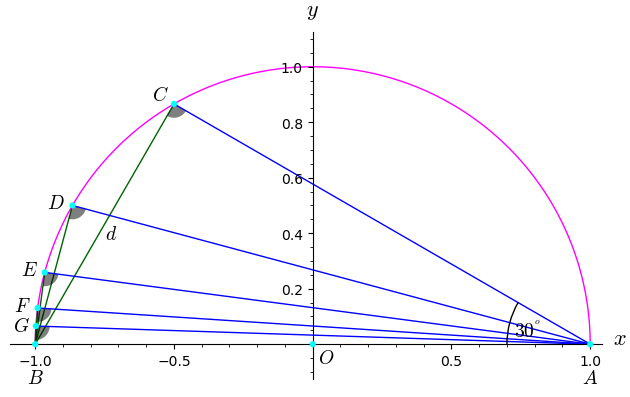

In [5]:
# Plot a semi-circle with axes.
r = 1
p = plot(sqrt(r^2 - x^2),(x,-1, 1), thickness=1.0, color='magenta', xmin=-1.1, xmax=1.1, 
         ymin=-0.1, ymax=1.1, axes_labels=['$x$','$y$'], zorder=0, aspect_ratio=1)
# Add hyphotenuse, edges and points.
alpha = 30
for i in range(0,5):
    rad = deg2rad(alpha)
    d0, h0 = loc[i][0], loc[i][1]
    p += plot(-x*tan(rad)+tan(rad),(x,-d0,1), color='blue', zorder=1)
    p += line([(-1.0, 0.0), (-d0, h0)], color='darkgreen', zorder=0)
    p += point((-d0,h0), color='cyan', pointsize=20, zorder=3)
    alpha /= 2
# Add labeling.  
label = {'$O$': (0.05, -0.05), '$B$': (-1.0, -0.12), '$A$': (1.0, -0.12), 
         '$C$': (-0.55, 0.90), '$D$': (-0.925, 0.51), '$E$': (-1.02, 0.27),
         '$F$': (-1.045, 0.14), '$G$': (-1.05, 0.065), '$d$': (-0.725, 0.4)} 
for char, posi in label.items():
    p += text(char, posi, fontsize=14, color='black', zorder=2)
# Add points.
p += point(((-1,0), (0,0), (1,0)), color='cyan', pointsize=20, zorder=3)
# Add marker for the right angle.
for i in range(0,5):
    rad = deg2rad(alpha)
    d0, h0 = loc[i][0], loc[i][1]
    p += disk((-d0, h0), 0.05, (ang[i][0],-ang[i][1]), color='black', alpha=0.5, zorder=0)
# Add angle.
p += arc((1.0, 0.0), 0.30, r2=None, sector=(pi,5*pi/6), thickness=1, linestyle='solid', color='black', zorder=4) 
p += text('$30^{^o}$', (0.775,0.05), fontsize=14, color='black', zorder=4)
# Draw the graph.    
p.plot()
# Save the grap as SVG file.
#p.save('archimedes_figure4.svg')

In [6]:
# Define the variables. Keep in Mind, that AB (diameter of the circle) is a constant.
var('AC Cd AB Bd')
# Euclid Book VI Proposition 3.
eq0 = AC / Cd == AB / Bd
println_eqno(eq0)


(Equation 1)	AC/Cd == AB/Bd



AC/Cd == AB/Bd

In [7]:
var('BC')
# Devide Equation 1 by BC.
eq1 = eq0 * 1/BC
println_eqno(eq1)
# Multiply Equation 2 with Cd.
eq2 = eq1 * Cd 
println_eqno(eq2)
# Multiply Equation 3 with Bd.
eq3 = eq2 * Bd
println_eqno(eq3)


(Equation 2)	AC/(BC*Cd) == AB/(BC*Bd)



AC/(BC*Cd) == AB/(BC*Bd)


(Equation 3)	AC/BC == AB*Cd/(BC*Bd)



AC/BC == AB*Cd/(BC*Bd)


(Equation 4)	AC*Bd/BC == AB*Cd/BC



AC*Bd/BC == AB*Cd/BC

In [8]:
# Add a term on left and right hand side to Equation 4.
eq4 = eq3 + (Bd*AB)/BC
println_eqno(eq4)


(Equation 5)	AB*Bd/BC + AC*Bd/BC == AB*Bd/BC + AB*Cd/BC



AB*Bd/BC + AC*Bd/BC == AB*Bd/BC + AB*Cd/BC

In [9]:
# Simplify Equation 5.
eq5 = eq4.full_simplify().factor()
println_eqno(eq5)
# Devide Equation 6 by Bd.
eq6 = eq5 / Bd
println_eqno(eq6)


(Equation 6)	(AB + AC)*Bd/BC == AB*(Bd + Cd)/BC



(AB + AC)*Bd/BC == AB*(Bd + Cd)/BC


(Equation 7)	(AB + AC)/BC == AB*(Bd + Cd)/(BC*Bd)



(AB + AC)/BC == AB*(Bd + Cd)/(BC*Bd)

In [10]:
# We know, that BC = Bd + Cd is.
# We know also that (AB*Bd + AB*Cd) = AB*(Bd + Cd).
# So we rewrite Equation 7.
eq7 = (AB + AC)/BC == AB*BC/(BC*Bd)
println_eqno(eq7)


(Equation 8)	(AB + AC)/BC == AB/Bd



(AB + AC)/BC == AB/Bd

In [11]:
var('AD BD')
# And now we consider AD/BD and
# use AB/Bd = AC/Cd = AD/BD.
eq9 = AD/BD == (AB + AC)/BC
println_eqno(eq9)


(Equation 9)	AD/BD == (AB + AC)/BC



AD/BD == (AB + AC)/BC

In [12]:
# Square Equation 9.
eq10 = eq9^2
println_eqno(eq10)


(Equation 10)	AD^2/BD^2 == (AB + AC)^2/BC^2



AD^2/BD^2 == (AB + AC)^2/BC^2

In [13]:
# Solve Equation 10 for AD^2.
eq11 = solve(eq10, AD^2)
println_eqno(eq11[0])


(Equation 11)	AD^2 == (AB^2 + 2*AB*AC + AC^2)*BD^2/BC^2



AD^2 == (AB^2 + 2*AB*AC + AC^2)*BD^2/BC^2

In [14]:
# Try to factorise Equation 11. 
eq12 = eq11[0].factor()
println_eqno(eq12)


(Equation 12)	AD^2 == (AB + AC)^2*BD^2/BC^2



AD^2 == (AB + AC)^2*BD^2/BC^2

In [15]:
# Get the determination equation for AD^2.
eq13 = AD^2 == AB^2 - BD^2
println_eqno(eq13)


(Equation 13)	AD^2 == AB^2 - BD^2



AD^2 == AB^2 - BD^2

In [16]:
# We are looking for the edge length BD.
eq14 = solve((AB + AC)^2*BD^2/BC^2 == AB^2 - BD^2, BD^2)
println_eqno(eq14[0])


(Equation 14)	BD^2 == AB^2*BC^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)



BD^2 == AB^2*BC^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)

In [17]:
# Factorise Equation 14.
eq15 = BD^2 == AB^2*BC^2/((AB^2 + 2*AB*AC + AC^2).factor() + BC^2)
println_eqno(eq15)


(Equation 15)	BD^2 == AB^2*BC^2/((AB + AC)^2 + BC^2)



BD^2 == AB^2*BC^2/((AB + AC)^2 + BC^2)

In [18]:
# Get the determination equation for AD^2.
eq16 = AD^2 == AB^2 - AB^2*BC^2/((AB + AC)^2 + BC^2)
println_eqno(eq16)


(Equation 16)	AD^2 == -AB^2*BC^2/((AB + AC)^2 + BC^2) + AB^2



AD^2 == -AB^2*BC^2/((AB + AC)^2 + BC^2) + AB^2

In [19]:
# Simplify Equation 16.
eq16a = eq16.full_simplify().factor()
println_eqno(eq16a)


(Equation 17)	AD^2 == (AB + AC)^2*AB^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)



AD^2 == (AB + AC)^2*AB^2/(AB^2 + 2*AB*AC + AC^2 + BC^2)

In [20]:
# Simplify Equation 17.
eq17 = AD^2 == (AB^4 + 2*AB^3*AC + AB^2*AC^2).factor()/((AB^2 + 2*AB*AC + AC^2).factor() + BC^2)
println_eqno(eq17)


(Equation 18)	AD^2 == (AB + AC)^2*AB^2/((AB + AC)^2 + BC^2)



AD^2 == (AB + AC)^2*AB^2/((AB + AC)^2 + BC^2)

In [21]:
# Simplify the square roots.
eq18 = (eq17^(1/2)).canonicalize_radical().factor()
println_eqno(eq18)


(Equation 19)	AD == (AB + AC)*AB/sqrt(AB^2 + 2*AB*AC + AC^2 + BC^2)



AD == (AB + AC)*AB/sqrt(AB^2 + 2*AB*AC + AC^2 + BC^2)

In [22]:
# First Archimedes determination equation.
Eq1 = AD == AB/sqrt(1+(BC^2/(AB+AC)^2))
println_eqno(Eq1)


(Equation 20)	AD == AB/sqrt(BC^2/(AB + AC)^2 + 1)



AD == AB/sqrt(BC^2/(AB + AC)^2 + 1)

In [23]:
# Second Archimedes determination equation.
Eq2 = BD == sqrt(AB^2 - AD^2)
println_eqno(Eq2)


(Equation 21)	BD == sqrt(AB^2 - AD^2)



BD == sqrt(AB^2 - AD^2)

In [24]:
# After the first iteration Eq. 1 and Eq. 2 are the start values for the
# next iteration. Eq. 1 is the new length of the hypothenuse and Eq. 2 is
# the new length of the edge. Archimedes did this for (6), 12, 24, 48 and
# 96 edges.